In [38]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
import statsmodels.api as sm
from pandas_profiling import ProfileReport 
from feature_engine.creation import CyclicalTransformer
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [39]:
training = pd.read_csv('training_data.csv', encoding = "latin")
testing = pd.read_csv('test_data.csv', encoding = "latin")
datasets = [training,testing]

In [40]:
profileTrain = ProfileReport(training)
profileTest = ProfileReport(testing)
#profileTrain.to_notebook_iframe()
#profileTest.to_notebook_iframe()

In [41]:
import scipy.stats as stat
import pylab

In [42]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

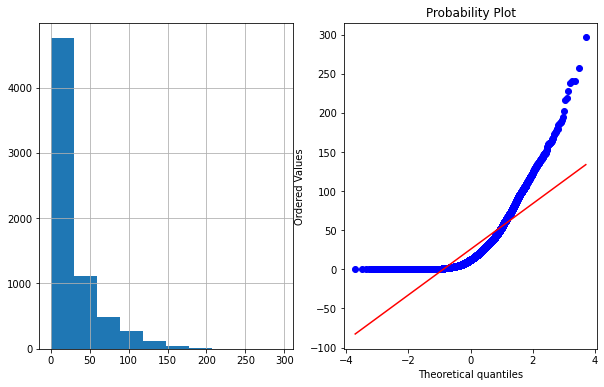

In [43]:
plot_data(training,'AVERAGE_TIME_DIFF')

In [44]:
#training['AVERAGE_TIME_DIFF'] = training.AVERAGE_TIME_DIFF**(1/2)
#plot_data(training,'AVERAGE_TIME_DIFF')

Treating NaN values

In [45]:
for data in datasets:
 data['AVERAGE_CLOUDINESS'] = data['AVERAGE_CLOUDINESS'].fillna(data['AVERAGE_CLOUDINESS'].mode()[0])
 #data['AVERAGE_CLOUDINESS'] = data['AVERAGE_CLOUDINESS'].fillna('NoData')

In [46]:
for data in datasets:
    data['AVERAGE_RAIN'] = data['AVERAGE_RAIN'].fillna(0)
    data.loc[data.AVERAGE_RAIN != 0, 'AVERAGE_RAIN'] = 1


In [47]:
#training.loc[training.AVERAGE_SPEED_DIFF == 'None', 'AVERAGE_SPEED_DIFF'] = '0'
#training.loc[training.AVERAGE_SPEED_DIFF == 'Low', 'AVERAGE_SPEED_DIFF'] = '1'
#training.loc[training.AVERAGE_SPEED_DIFF == 'Medium', 'AVERAGE_SPEED_DIFF'] = '2'
#training.loc[training.AVERAGE_SPEED_DIFF == 'High', 'AVERAGE_SPEED_DIFF'] = '3'
#training.loc[training.AVERAGE_SPEED_DIFF == 'Very_High', 'AVERAGE_SPEED_DIFF'] = '4'

In [48]:
for data in datasets:

    data['record_date'] = pd.to_datetime(training['record_date'])

    data['weekday'] = data['record_date'].dt.dayofweek
    data['hour'] = data['record_date'].dt.hour
    data['month'] = data['record_date'].dt.month
    data['year'] = data['record_date'].dt.year
    data['day'] = data['record_date'].dt.day
    data['week'] = data['record_date'].dt.isocalendar().week

In [49]:
def applyer(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0 

for data in datasets:
    temp2 = data['weekday'].apply(applyer) 
    data['is_weekend']=temp2

In [50]:
for data in datasets:
    data['AVERAGE_DISTANCE_FREE'] = data['AVERAGE_FREE_FLOW_TIME'] * data['AVERAGE_FREE_FLOW_SPEED']
    data['AVERAGE_TIME'] = data['AVERAGE_TIME_DIFF'] + data['AVERAGE_FREE_FLOW_TIME'] 
    data['AVERAGE_SPEED'] =  data['AVERAGE_DISTANCE_FREE'] / data['AVERAGE_TIME']
    data['AVERAGE_SPEED_DIFF_Num'] =  data['AVERAGE_FREE_FLOW_SPEED'] - data['AVERAGE_SPEED']

In [51]:
'''corr = training.copy()

corr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes
corr['AVERAGE_RAIN'].sort_values(ascending=False)

corr['AVERAGE_CLOUDINESS']=corr['AVERAGE_CLOUDINESS'].astype('category').cat.codes
corr['AVERAGE_CLOUDINESS'].sort_values(ascending=False)

corr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes
corr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)

corr['LUMINOSITY']=corr['LUMINOSITY'].astype('category').cat.codes
corr['LUMINOSITY'].sort_values(ascending=False)

corr['weekday']=corr['weekday'].astype('category').cat.codes
corr['weekday'].sort_values(ascending=False)'''



"corr = training.copy()\n\ncorr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes\ncorr['AVERAGE_RAIN'].sort_values(ascending=False)\n\ncorr['AVERAGE_CLOUDINESS']=corr['AVERAGE_CLOUDINESS'].astype('category').cat.codes\ncorr['AVERAGE_CLOUDINESS'].sort_values(ascending=False)\n\ncorr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes\ncorr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)\n\ncorr['LUMINOSITY']=corr['LUMINOSITY'].astype('category').cat.codes\ncorr['LUMINOSITY'].sort_values(ascending=False)\n\ncorr['weekday']=corr['weekday'].astype('category').cat.codes\ncorr['weekday'].sort_values(ascending=False)"

In [52]:
'''#Using Pearson Correlation
plt.figure(figsize=(17,17))
cor = corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()'''

'#Using Pearson Correlation\nplt.figure(figsize=(17,17))\ncor = corr.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)\nplt.show()'

In [53]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
#corr_features = correlation(corr, 0.75)
#len(set(corr_features))

In [55]:
testing.AVERAGE_CLOUDINESS.value_counts()

céu claro            944
céu pouco nublado    109
algumas nuvens        98
nuvens quebrados      96
nuvens quebradas      95
nuvens dispersas      94
céu limpo             27
tempo nublado         20
nublado               17
Name: AVERAGE_CLOUDINESS, dtype: int64

In [56]:
for i in datasets:
    i.loc[i.AVERAGE_CLOUDINESS == 'céu claro', 'AVERAGE_CLOUDINESS'] = 'céu limpo'
    i.loc[i.AVERAGE_CLOUDINESS == 'nuvens quebrados', 'AVERAGE_CLOUDINESS'] = 'nuvens dispersas'
    i.loc[i.AVERAGE_CLOUDINESS == 'nuvens quebradas', 'AVERAGE_CLOUDINESS'] = 'nuvens dispersas'
    i.loc[i.AVERAGE_CLOUDINESS == 'algumas nuvens', 'AVERAGE_CLOUDINESS'] = 'céu pouco nublado'
    i.loc[i.AVERAGE_CLOUDINESS == 'tempo nublado', 'AVERAGE_CLOUDINESS'] = 'nublado'
    i.loc[i.AVERAGE_CLOUDINESS == 'nublado', 'AVERAGE_CLOUDINESS'] = 'nuvens dispersas'

In [57]:
for i in datasets:
    i.loc[i.LUMINOSITY == 'LOW_LIGHT', 'LUMINOSITY'] = 'DARK'

In [58]:
profileTrain = ProfileReport(training)
profileTest = ProfileReport(testing)
#profileTrain.to_notebook_iframe()
#profileTest.to_notebook_iframe()

In [59]:

cyclical = CyclicalTransformer(variables=None, drop_original=True)

for i in datasets:

    cic = cyclical.fit_transform(i[['weekday','hour','month','year','day']])
    i['weekday_sin'] = cic['weekday_sin'].values
    i['weekday_cos'] = cic['weekday_cos'].values

    i['hour_sin'] = cic['hour_sin'].values
    i['hour_cos'] = cic['hour_cos'].values

    i['month_sin'] = cic['month_sin'].values
    i['month_cos'] = cic['month_cos'].values

    i['year_sin'] = cic['year_sin'].values
    i['year_cos'] = cic['year_cos'].values

    i['day_sin'] = cic['day_sin'].values
    i['day_cos'] = cic['day_cos'].values

training = training.drop(['weekday','hour','month','year','day'],axis=1)
testing = testing.drop(['weekday','hour','month','year','day'],axis=1)

In [60]:
for data in datasets:
    if 'AVERAGE_SPEED_DIFF' in data:
        data['AVERAGE_SPEED_DIFF'] = data['AVERAGE_SPEED_DIFF'].astype('category')
    data['AVERAGE_RAIN'] = data['AVERAGE_RAIN'].astype('category')
    data['LUMINOSITY'] = data['LUMINOSITY'].astype('category')
    data['AVERAGE_CLOUDINESS'] = data['AVERAGE_CLOUDINESS'].astype('category')

In [61]:
df_dummies_train = training[['LUMINOSITY','AVERAGE_CLOUDINESS']]

df_dummies_test = testing[['LUMINOSITY','AVERAGE_CLOUDINESS']]


In [62]:
for i in df_dummies_train:
    training = pd.concat([training,pd.get_dummies(training[i])],axis='columns').drop([i],axis='columns')

for i in df_dummies_test:
    testing = pd.concat([testing,pd.get_dummies(testing[i])],axis='columns').drop([i],axis='columns')

In [63]:
training = training.drop(['city_name','record_date','AVERAGE_PRECIPITATION'],axis=1)
testing = testing.drop(['city_name','record_date','AVERAGE_PRECIPITATION'],axis=1)

In [64]:
'''corr = training.copy()

corr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes
corr['AVERAGE_RAIN'].sort_values(ascending=False)

corr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes
corr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)



#Using Pearson Correlation
plt.figure(figsize=(17,17))
cor = corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()'''

"corr = training.copy()\n\ncorr['AVERAGE_RAIN']=corr['AVERAGE_RAIN'].astype('category').cat.codes\ncorr['AVERAGE_RAIN'].sort_values(ascending=False)\n\ncorr['AVERAGE_SPEED_DIFF']=corr['AVERAGE_SPEED_DIFF'].astype('category').cat.codes\ncorr['AVERAGE_SPEED_DIFF'].sort_values(ascending=False)\n\n\n\n#Using Pearson Correlation\nplt.figure(figsize=(17,17))\ncor = corr.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)\nplt.show()"

In [65]:
def correlation2(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, 0]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [66]:
#drop = correlation2(corr,0.10)

In [67]:
#training = training.drop(drop,axis=1)
#testing = testing.drop(drop,axis=1)

In [68]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


X = training.drop(['AVERAGE_SPEED_DIFF'],axis=1)

y = training[['AVERAGE_SPEED_DIFF']]

ordered_rank_features=SelectKBest(score_func=f_classif,k='all')
ordered_feature = ordered_rank_features.fit(X,y)

dfscores = pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns = pd.DataFrame(X.columns)

featured_rank=pd.concat([dfcolumns,dfscores],axis=1)
featured_rank.columns=['Features','Score']

featured_rank.sort_values(by='Score',ascending=False)'''

"from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\nfrom sklearn.feature_selection import f_classif\n\n\nX = training.drop(['AVERAGE_SPEED_DIFF'],axis=1)\n\ny = training[['AVERAGE_SPEED_DIFF']]\n\nordered_rank_features=SelectKBest(score_func=f_classif,k='all')\nordered_feature = ordered_rank_features.fit(X,y)\n\ndfscores = pd.DataFrame(ordered_feature.scores_,columns=['Score'])\ndfcolumns = pd.DataFrame(X.columns)\n\nfeatured_rank=pd.concat([dfcolumns,dfscores],axis=1)\nfeatured_rank.columns=['Features','Score']\n\nfeatured_rank.sort_values(by='Score',ascending=False)"

In [69]:
#training = training.drop(['AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED'],axis=1)
#testing = testing.drop(['AVERAGE_TEMPERATURE','AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_WIND_SPEED'],axis=1)

In [70]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 1   AVERAGE_TIME_DIFF        1500 non-null   float64
 2   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 3   AVERAGE_TEMPERATURE      1500 non-null   float64
 4   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 5   AVERAGE_HUMIDITY         1500 non-null   float64
 6   AVERAGE_WIND_SPEED       1500 non-null   float64
 7   AVERAGE_RAIN             1500 non-null   object 
 8   week                     1500 non-null   UInt32 
 9   is_weekend               1500 non-null   int64  
 10  AVERAGE_DISTANCE_FREE    1500 non-null   float64
 11  AVERAGE_TIME             1500 non-null   float64
 12  AVERAGE_SPEED            1500 non-null   float64
 13  AVERAGE_SPEED_DIFF_Num   1500 non-null   float64
 14  weekday_sin             

In [71]:
training.to_csv('processedTrain.csv',index=False)
testing.to_csv('processedTest.csv',index=False)